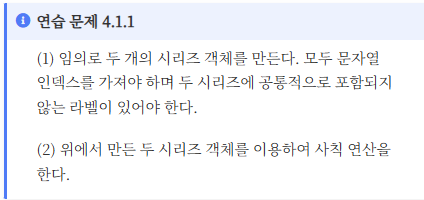

In [2]:
# 4.1.1

import pandas as pd
a = pd.Series([1,2,3], index=['a','b','c'])
b = pd.Series([4,9,16], index = ['A','b','c'])

print(a-b)
print(a*b)
print((a+b)/2)

A     NaN
a     NaN
b    -7.0
c   -13.0
dtype: float64
A     NaN
a     NaN
b    18.0
c    48.0
dtype: float64
A    NaN
a    NaN
b    5.5
c    9.5
dtype: float64


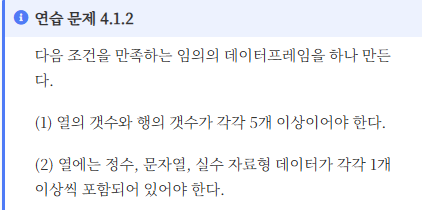

In [3]:
# 4.1.2
import numpy as np
a = pd.DataFrame(['a','b','c','d','e'],columns=['A'])
a['B'] = np.linspace(0,40,5, dtype='i')
a['C'] = np.linspace(50,90,5, dtype='i')
a['D'] = np.linspace(0,1,5)
a['E'] = np.linspace(0,2,5)
a


,A,B,C,D,E
0,a,0,50,0.00,0.0
1,b,10,60,0.25,0.5
2,c,20,70,0.50,1.0
3,d,30,80,0.75,1.5
4,e,40,90,1.00,2.0


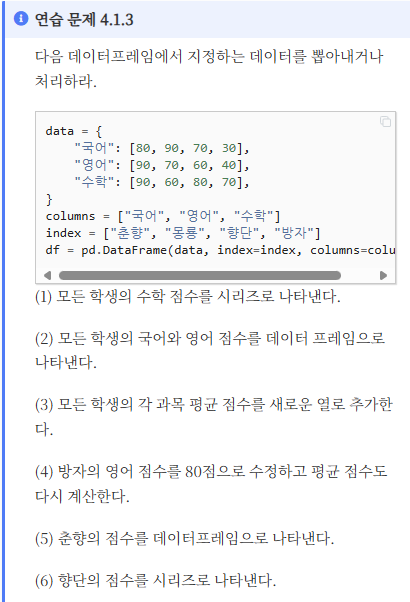

In [4]:
# 4.1.3

data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

print(df['수학'])
print()
print(df[['국어','영어']])
print()
df['평균'] = np.mean(df,axis=1)
print(df['평균'])


춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

    국어  영어
춘향  80  90
몽룡  90  70
향단  70  60
방자  30  40

춘향    86.666667
몽룡    73.333333
향단    70.000000
방자    46.666667
Name: 평균, dtype: float64


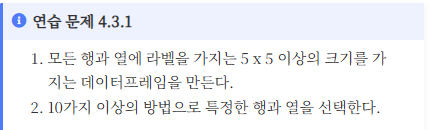

In [5]:
# 4.3.1
a = pd.DataFrame(np.linspace(0,100,36).reshape((6,6)),
                 index = [chr(i) for i in range(65,71)],
                 columns = [chr(i) for i in range(97,103)])
print(a.loc[:,:])
print(a['a'])
print(a.loc['A':'C','b':'e'])
print(a.loc[(a.b<10)&(a.b>4), :])
print(a.loc['A',:])
print(a.loc[:,'a'])
print(a.iloc[-1])
print(a.iloc[::2,::2])
print(a.loc[['A','B'],['a','e']])
print(a.iloc[:2,:3])

           a          b          c          d          e           f
A   0.000000   2.857143   5.714286   8.571429  11.428571   14.285714
B  17.142857  20.000000  22.857143  25.714286  28.571429   31.428571
C  34.285714  37.142857  40.000000  42.857143  45.714286   48.571429
D  51.428571  54.285714  57.142857  60.000000  62.857143   65.714286
E  68.571429  71.428571  74.285714  77.142857  80.000000   82.857143
F  85.714286  88.571429  91.428571  94.285714  97.142857  100.000000
A     0.000000
B    17.142857
C    34.285714
D    51.428571
E    68.571429
F    85.714286
Name: a, dtype: float64
           b          c          d          e
A   2.857143   5.714286   8.571429  11.428571
B  20.000000  22.857143  25.714286  28.571429
C  37.142857  40.000000  42.857143  45.714286
Empty DataFrame
Columns: [a, b, c, d, e, f]
Index: []
a     0.000000
b     2.857143
c     5.714286
d     8.571429
e    11.428571
f    14.285714
Name: A, dtype: float64
A     0.000000
B    17.142857
C    34.285714
D    5

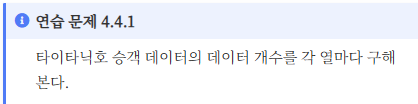

In [6]:
# 4.4.1

import seaborn as sns
tdf = sns.load_dataset("titanic")
tdf.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

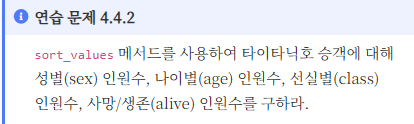

In [7]:
# 4.4.2

print(tdf['sex'].value_counts())
print(tdf['age'].value_counts())
print(tdf['class'].value_counts())
print(tdf['alive'].value_counts())

sex
male      577
female    314
Name: count, dtype: int64
age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


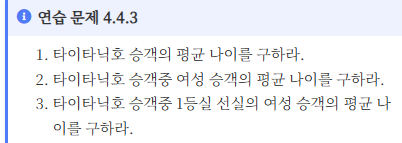

In [8]:
# 4.4.3

print(tdf['age'].mean())
print(tdf.loc[tdf.sex == 'female', 'age'].mean())
print(tdf.loc[(tdf['class'] == 'First')&(tdf['sex'] == 'female'),'age'].mean())

29.69911764705882
27.915708812260537
34.61176470588235


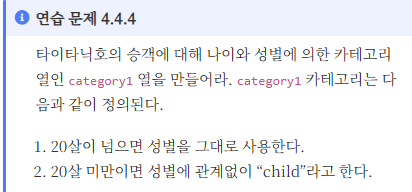

In [9]:
# 4.4.4
tdf['category1'] = tdf.apply(lambda x : x.sex if x.age >=20 else "child",axis=1)
print(tdf.loc[:,['sex','age','category1']].head(10))

      sex   age category1
0    male  22.0      male
1  female  38.0    female
2  female  26.0    female
3  female  35.0    female
4    male  35.0      male
5    male   NaN     child
6    male  54.0      male
7    male   2.0     child
8  female  27.0    female
9  female  14.0     child


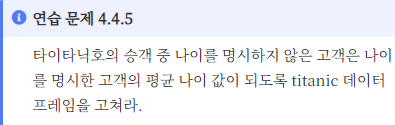

In [10]:
# 4.4.5
tdf['age'] = tdf['age'].fillna(tdf['age'].mean())
print(tdf['age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64


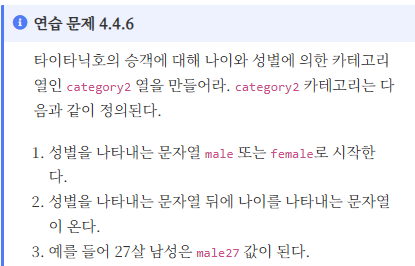

In [11]:
# 4.4.6
tdf['category2'] = tdf.apply(lambda x : f'{x.sex}{round(x.age)}',axis=1)
print(tdf[['sex','age','category2']])

        sex        age category2
0      male  22.000000    male22
1    female  38.000000  female38
2    female  26.000000  female26
3    female  35.000000  female35
4      male  35.000000    male35
..      ...        ...       ...
886    male  27.000000    male27
887  female  19.000000  female19
888  female  29.699118  female30
889    male  26.000000    male26
890    male  32.000000    male32

[891 rows x 3 columns]


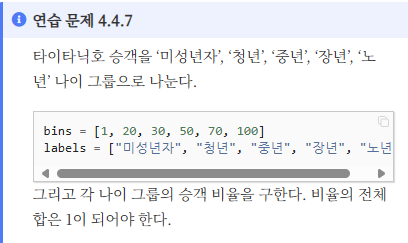

In [12]:
# 4.4.7
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
age_bin = pd.cut(tdf['age'], bins, labels = labels)
print(age_bin.value_counts()/age_bin.count())


age
청년      0.464082
중년      0.274800
미성년자    0.188141
장년      0.067275
노년      0.005701
Name: count, dtype: float64


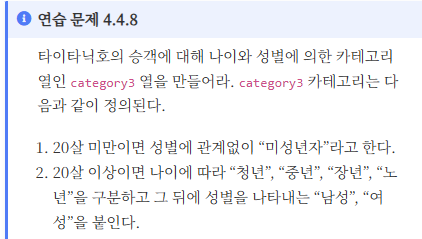

In [13]:
# 4.4.8

tdf['category3'] = age_bin
print(age_bin)
tdf['category3'] = tdf.apply(lambda x : "{0}{1}".format(x.category3,('남성' if x.sex == 'male' else '여성') if x.age >=20 else ""), axis=1)
print(tdf[['sex','age','category3']])

0        청년
1        중년
2        청년
3        중년
4        중년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      중년
Name: age, Length: 891, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']
        sex        age category3
0      male  22.000000      청년남성
1    female  38.000000      중년여성
2    female  26.000000      청년여성
3    female  35.000000      중년여성
4      male  35.000000      중년남성
..      ...        ...       ...
886    male  27.000000      청년남성
887  female  19.000000      미성년자
888  female  29.699118      청년여성
889    male  26.000000      청년남성
890    male  32.000000      중년남성

[891 rows x 3 columns]


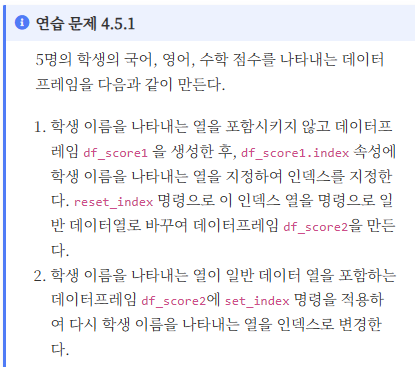

In [14]:
# 4.5.1
data = {
    "국어": [80, 90, 70, 30,10],
    "영어": [90, 70, 60, 40,10],
    "수학": [90, 60, 80, 70,10],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자",'가가']
df_score1 = pd.DataFrame(data, index=index, columns=columns)
df_score2 = df_score1.reset_index()
print(df_score1)
print(df_score2)
print(df_score2.set_index('index'))

    국어  영어  수학
춘향  80  90  90
몽룡  90  70  60
향단  70  60  80
방자  30  40  70
가가  10  10  10
  index  국어  영어  수학
0    춘향  80  90  90
1    몽룡  90  70  60
2    향단  70  60  80
3    방자  30  40  70
4    가가  10  10  10
       국어  영어  수학
index            
춘향     80  90  90
몽룡     90  70  60
향단     70  60  80
방자     30  40  70
가가     10  10  10


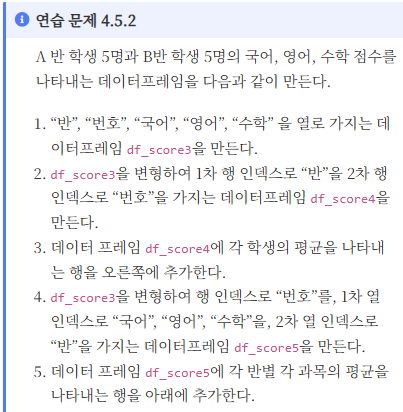

In [39]:
# 4.5.2
import random as rnd
df_score3 = pd.DataFrame({
    "반":['A']*5+['B']*5,
    "번호" : list(range(5))*2,
    '국어':np.random.randint(0,100,10),
    '영어':np.random.randint(0,100,10),
    '수학':np.random.randint(0,100,10)  
})
print(df_score3)
print()

df_score4 = pd.DataFrame(df_score3).set_index(['반','번호'])
print(df_score4)
print()

df_score4['평균'] = df_score4.mean(axis=1)
print(df_score4)
print()

df_score5 = df_score3.set_index(['반','번호'])
df_score5 = df_score5.unstack('반')
print(df_score5)
print()

df_score5.loc["평균"] = df_score5.mean(axis=0)
print(df_score5)

   반  번호  국어  영어  수학
0  A   0  34  68  76
1  A   1   6  47  49
2  A   2  71  88  45
3  A   3   6  97  64
4  A   4  45  91   9
5  B   0  12  13  85
6  B   1  15  27  77
7  B   2  35  97  23
8  B   3  43  47  37
9  B   4  53  13  95

      국어  영어  수학
반 번호            
A 0   34  68  76
  1    6  47  49
  2   71  88  45
  3    6  97  64
  4   45  91   9
B 0   12  13  85
  1   15  27  77
  2   35  97  23
  3   43  47  37
  4   53  13  95

      국어  영어  수학         평균
반 번호                       
A 0   34  68  76  59.333333
  1    6  47  49  34.000000
  2   71  88  45  68.000000
  3    6  97  64  55.666667
  4   45  91   9  48.333333
B 0   12  13  85  36.666667
  1   15  27  77  39.666667
  2   35  97  23  51.666667
  3   43  47  37  42.333333
  4   53  13  95  53.666667

    국어      영어      수학    
반    A   B   A   B   A   B
번호                        
0   34  12  68  13  76  85
1    6  15  47  27  49  77
2   71  35  88  97  45  23
3    6  43  97  47  64  37
4   45  53  91  13   9  95

      국어 

In [29]:
[1]+[2]

[1, 2]

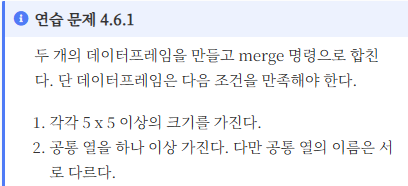

In [76]:
# 4.6.1
np.random.seed(0)
N=6
Com_n = 2
ch_st = ord('A')
common_p = np.random.randint(0,100,7)
a = pd.DataFrame(np.random.randint(0,100,(7,6)),
                 columns=[chr(i) for i in range(ch_st,ch_st+N)])
a['CCC'] = common_p
b = pd.DataFrame(np.random.randint(0,100,(7,6)),
                 columns = [chr(i) for i in range(ch_st+N+1-Com_n,ch_st+1+2*N-Com_n)])
b['CCC'] = common_p
print(a)
print()
print(b)
print()

print(pd.merge(a,b, on='CCC'))

    A   B   C   D   E   F  CCC
0  21  36  87  70  88  88   44
1  12  58  65  39  87  46   47
2  88  81  37  25  77  72   64
3   9  20  80  69  79  47   67
4  64  82  99  88  49  29   67
5  19  19  14  39  32  65    9
6   9  57  32  31  74  23   83

    F   G   H   I   J   K  CCC
0  35  75  55  28  34   0   44
1   0  36  53   5  38  17   47
2  79   4  42  58  31   1   64
3  65  41  57  35  11  46   67
4  82  91   0  14  99  53   67
5  12  42  84  75  68   6    9
6  68  47   3  76  52  78   83

    A   B   C   D   E  F_x  CCC  F_y   G   H   I   J   K
0  21  36  87  70  88   88   44   35  75  55  28  34   0
1  12  58  65  39  87   46   47    0  36  53   5  38  17
2  88  81  37  25  77   72   64   79   4  42  58  31   1
3   9  20  80  69  79   47   67   65  41  57  35  11  46
4   9  20  80  69  79   47   67   82  91   0  14  99  53
5  64  82  99  88  49   29   67   65  41  57  35  11  46
6  64  82  99  88  49   29   67   82  91   0  14  99  53
7  19  19  14  39  32   65    9   12  42  84  

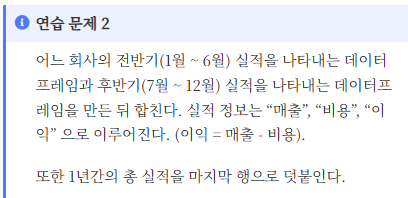

In [83]:
# 4.6.2

np.random.seed(0)
front = pd.DataFrame(np.random.randint(0,100,(6,2)),
                     columns = ['매출','비용'],
                     index = [f'{i}월' for i in range(1,7)])
front['이익'] = front['매출'] - front['비용']
back = pd.DataFrame(np.random.randint(0,100,(6,2)),
                     columns = ['매출','비용'],
                     index = [f'{i}월' for i in range(7,13)])
back['이익'] = back['매출'] - back['비용']
print(front)
print()
print(back)
print()
total = pd.concat([front,back])
total.loc['총계'] = total.sum(axis=0)
print(total)

    매출  비용  이익
1월  44  47  -3
2월  64  67  -3
3월  67   9  58
4월  83  21  62
5월  36  87 -51
6월  70  88 -18

     매출  비용  이익
7월   88  12  76
8월   58  65  -7
9월   39  87 -48
10월  46  88 -42
11월  81  37  44
12월  25  77 -52

      매출   비용  이익
1월    44   47  -3
2월    64   67  -3
3월    67    9  58
4월    83   21  62
5월    36   87 -51
6월    70   88 -18
7월    88   12  76
8월    58   65  -7
9월    39   87 -48
10월   46   88 -42
11월   81   37  44
12월   25   77 -52
총계   701  685  16


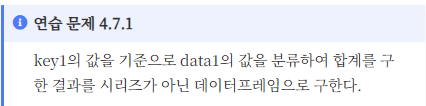

In [84]:
# 4.7.1
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
print(df2)
print()
print(df2.data1.groupby(df2.key1).sum())

  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
2    B  one      3     30
3    B  two      4     40
4    A  one      5     50

key1
A    8
B    7
Name: data1, dtype: int64


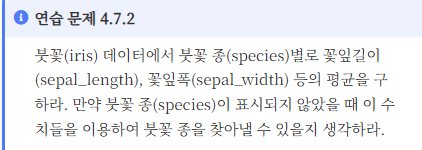

In [85]:
# 4.7.2

iris = sns.load_dataset('iris')
print(iris[['sepal_length','sepal_width']].groupby(iris.species).mean())

            sepal_length  sepal_width
species                              
setosa             5.006        3.428
versicolor         5.936        2.770
virginica          6.588        2.974


- `sepal_length`가 크면 virginica일 확률이 높다
- `sepal_width`가 작으면 versicolor일 확률이 높다
- `sepal_width`가 크면 setosa일 확률이 높다

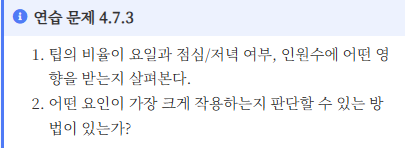

In [93]:
# 4.7.3
tips_df = sns.load_dataset('tips')
print(tips_df.head())
print(tips_df.info())
"""
total_bill: 식사대금
tip: 팁
sex: 성별
smoker: 흡연/금연 여부
day: 요일
time: 시간
size: 인원
"""

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [95]:
tips_df['tip_pct'] = tips_df['tip'] / tips_df['total_bill']
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808


In [103]:
def diff(x):
    d=tips_df.groupby(x).tip_pct.mean()
    print(f'### Factor {x} ###')
    print(d)
    print(f"Max Effect : {d.max()/d.min()}")
diff('day')
diff('time')
diff('size')

### Factor day ###
day
Thur    0.161276
Fri     0.169913
Sat     0.153152
Sun     0.166897
Name: tip_pct, dtype: float64
Max Effect : 1.109442536727837
### Factor time ###
time
Lunch     0.164128
Dinner    0.159518
Name: tip_pct, dtype: float64
Max Effect : 1.0289004719661212
### Factor size ###
size
1    0.217292
2    0.165719
3    0.152157
4    0.145949
5    0.141495
6    0.156229
Name: tip_pct, dtype: float64
Max Effect : 1.535681568526217


C:\Users\leeyu\AppData\Local\Temp\ipykernel_20196\1400025301.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d=tips_df.groupby(x).tip_pct.mean()


종업원의 수(`size`)가 팁 비율에 가장 큰 영향을 주기 때문에 가장 크게 작용하는 요인이라고 볼 수 있다.

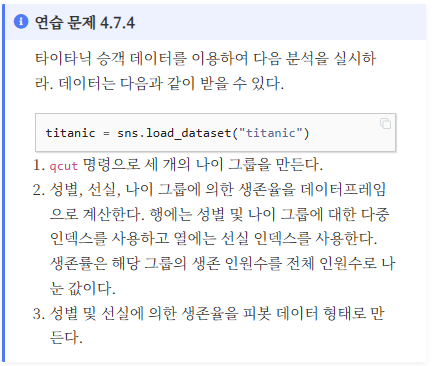

In [115]:
# 4.7.4

titanic = sns.load_dataset('titanic')
print(titanic.info())
titanic['AgeQ']=pd.qcut(titanic.age,3, labels = ['Q1','Q2','Q3'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [120]:
print(titanic.groupby(['sex','class','AgeQ']).survived.mean().unstack('class'))

class           First    Second     Third
sex    AgeQ                              
female Q1    0.954545  1.000000  0.508475
       Q2    0.947368  0.909091  0.481481
       Q3    0.977273  0.857143  0.250000
male   Q1    0.500000  0.357143  0.158879
       Q2    0.500000  0.076923  0.195652
       Q3    0.347826  0.062500  0.055556


C:\Users\leeyu\AppData\Local\Temp\ipykernel_20196\3789670345.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby(['sex','class','AgeQ']).survived.mean().unstack('class'))


In [126]:
print(titanic.pivot_table('survived','sex','class',aggfunc='mean'))

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


C:\Users\leeyu\AppData\Local\Temp\ipykernel_20196\1417633848.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(titanic.pivot_table('survived','sex','class',aggfunc='mean'))


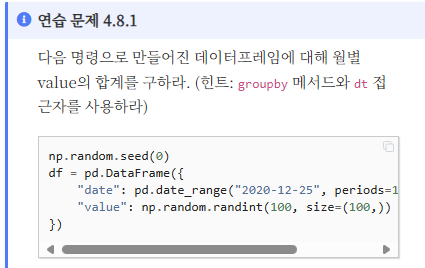

In [170]:
# 4.8.1
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2020-12-25", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))
})
print(df.head())
res = df.set_index('date').resample('M').sum()
res.index = pd.Series(res.index).dt.month
res.index.names = ['Month']
res.columns = ['Sum']
print(res)

        date  value
0 2020-12-25     44
1 2020-12-26     47
2 2020-12-27     64
3 2020-12-28     67
4 2020-12-29     67
        Sum
Month      
12      381
1      1811
2       985
3      1500
4       146


C:\Users\leeyu\AppData\Local\Temp\ipykernel_20196\1241217045.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  res = df.set_index('date').resample('M').sum()
